# CS 1656 – Introduction to Data Science (Fall 2024) 

## Instructor: Alexandros Labrinidis
## Teaching Assistants: Evangelos Karageorgos, Xiaoting Li, Zi Han Ding

## Term Project 

**Released: March 20, 2024**

**Due: April 17, 2024**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` and a python file, called `calculations.py`, that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from calculations import Calculations

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [112]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

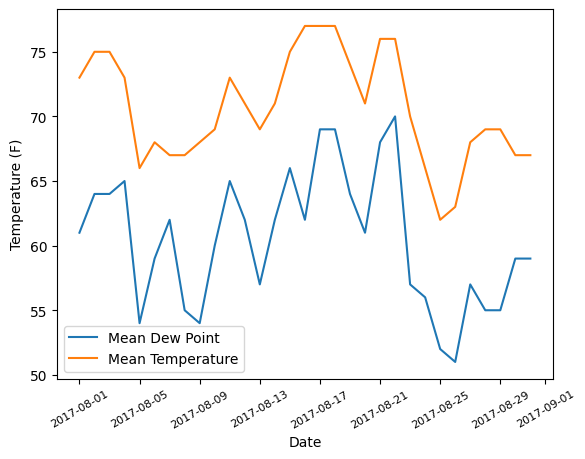

In [113]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])
plt.xticks(rotation=30, fontsize=8)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

### Running Calculations

In [114]:
calculations = Calculations(['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv', 'HealthyRideRentals2021-Q3.csv'])
trips = calculations.trips
print("Available columns in trips data:", trips.columns)

### Task 1.1

In [ ]:
trips = calculations.get_trips()
trips.head(5)


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,hour,month,day
0,111375309,2021-01-12 12:48:00,1/12/2021 13:04,70782,963,49641.0,11th St & Penn Ave,1061.0,33rd St & Penn Ave,Subscriber,12,01/2021,01/12/2021
1,111390480,2021-01-13 09:32:00,1/13/2021 9:39,70578,387,49391.0,E Liberty Blvd & Negley Ave,1064.0,Frankstown Ave & E Liberty Blvd,Subscriber,9,01/2021,01/13/2021
2,111441111,2021-01-15 17:43:00,1/15/2021 18:52,70935,4190,1072.0,Glasshouse,1072.0,Glasshouse,Subscriber,17,01/2021,01/15/2021
3,111529394,2021-01-20 16:00:00,1/20/2021 16:11,70910,612,1068.0,Forbes Ave & Murray Ave,1032.0,Walnut St & College St,Subscriber,16,01/2021,01/20/2021
4,111609524,2021-01-24 14:40:00,1/24/2021 21:12,70910,23511,1032.0,Walnut St & College St,1056.0,Wood St & Sixth Ave,Customer,14,01/2021,01/24/2021


### Task 1.1

In [ ]:
daily_counts = calculations.get_daily_counts()
daily_counts.head(10)

,day,station_id,fromCNT,toCNT,rebalCNT
0,01/01/2021,1002,1,1,0
1,01/01/2021,1010,1,0,0
2,01/01/2021,1017,0,2,0
3,01/01/2021,1024,1,1,0
4,01/01/2021,1028,1,1,0
5,01/01/2021,1032,1,0,0
6,01/01/2021,1039,0,1,0
7,01/01/2021,1059,1,1,0
8,01/01/2021,1062,2,2,0
9,01/01/2021,1094,2,0,0


### Task 1.2

In [ ]:
monthly_counts = calculations.get_monthly_counts()
monthly_counts.head(10)

,month,station_id,fromCNT,toCNT,rebalCNT
0,01/2021,1000,23,29,2
1,01/2021,1001,18,27,0
2,01/2021,1002,27,27,3
3,01/2021,1003,2,1,0
4,01/2021,1004,20,16,3
5,01/2021,1005,6,3,0
6,01/2021,1006,8,8,1
7,01/2021,1007,9,7,1
8,01/2021,1009,8,3,0
9,01/2021,1010,47,30,12


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [ ]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = "04/2021"
filter_stationID = 1046


### Task 2.1

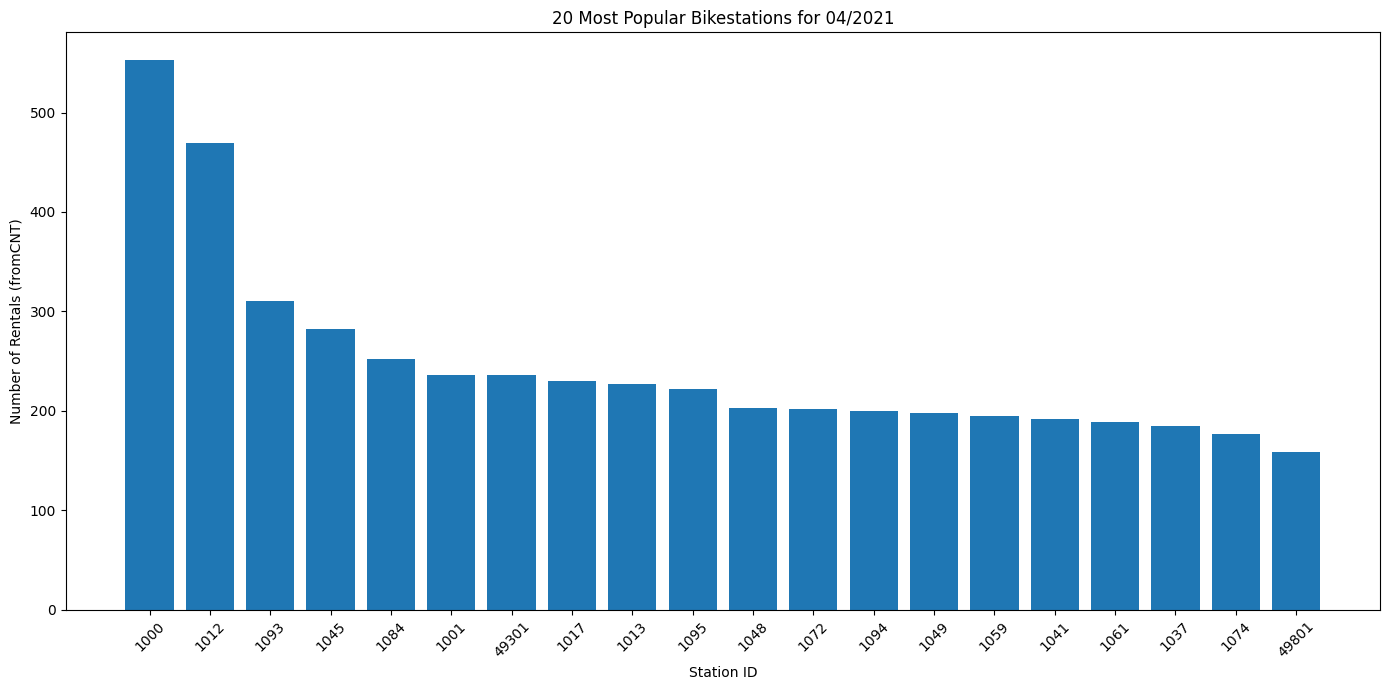

In [ ]:

monthly_filtered = monthly_counts[monthly_counts['month'] == filter_month]


popular_stations = monthly_filtered.nlargest(20, 'fromCNT')
plt.figure(figsize=(14, 7))
plt.bar(popular_stations['station_id'].astype(str), popular_stations['fromCNT'])
plt.title('20 Most Popular Bikestations for ' + filter_month)
plt.xlabel('Station ID')
plt.ylabel('Number of Rentals (fromCNT)')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


### Task 2.2

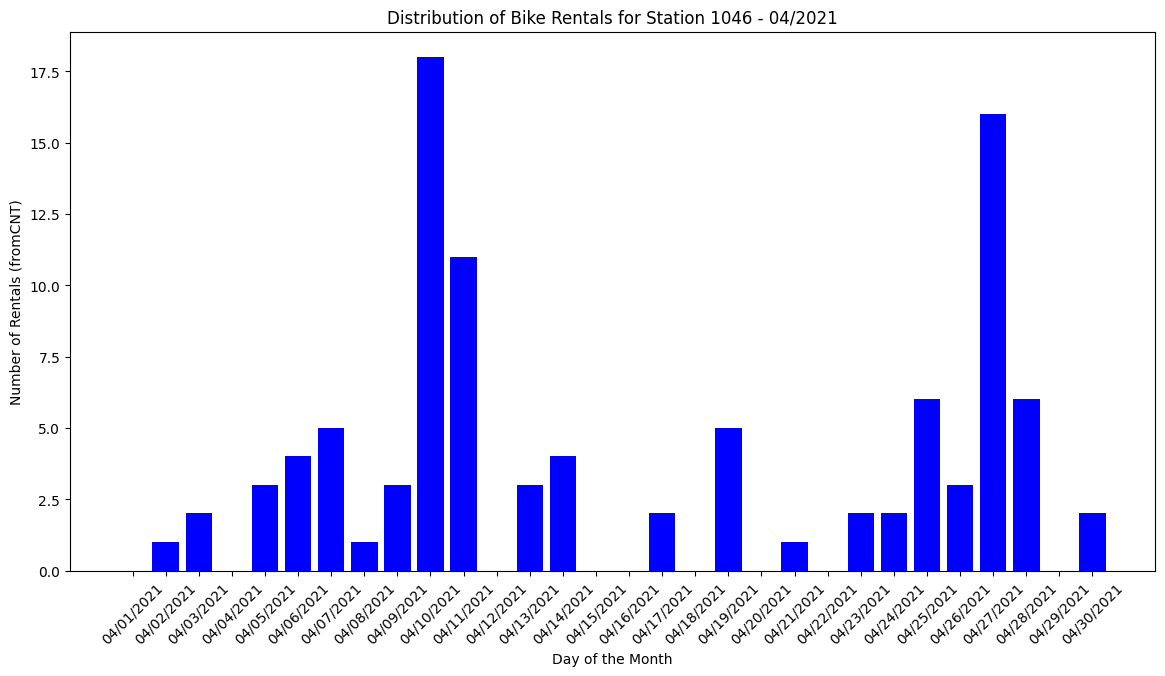

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

date_range = pd.date_range(start=f'{filter_month[:2]}/01/{filter_month[3:]}', 
                           end=f'{filter_month[:2]}/30/{filter_month[3:]}', freq='D')
all_days = pd.DataFrame(date_range, columns=['day'])
all_days['day'] = all_days['day'].dt.strftime('%m/%d/%Y')  
daily_counts['day'] = pd.to_datetime(daily_counts['day'], format='%m/%d/%Y').dt.strftime('%m/%d/%Y')
daily_counts['month_year'] = pd.to_datetime(daily_counts['day'], format='%m/%d/%Y').dt.strftime('%m/%Y')
filtered_data = daily_counts[(daily_counts['month_year'] == filter_month) & 
                             (daily_counts['station_id'] == filter_stationID)]

filtered_data_complete = pd.merge(all_days, filtered_data, on='day', how='left').fillna({'fromCNT': 0})

filtered_data_complete = filtered_data_complete.sort_values(by='day')
plt.figure(figsize=(14, 7))
plt.bar(filtered_data_complete['day'], filtered_data_complete['fromCNT'], color='blue')

plt.title(f'Distribution of Bike Rentals for Station {filter_stationID} - {filter_month}')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Rentals (fromCNT)')
plt.xticks(rotation=45)  
plt.show()


### Task 2.3

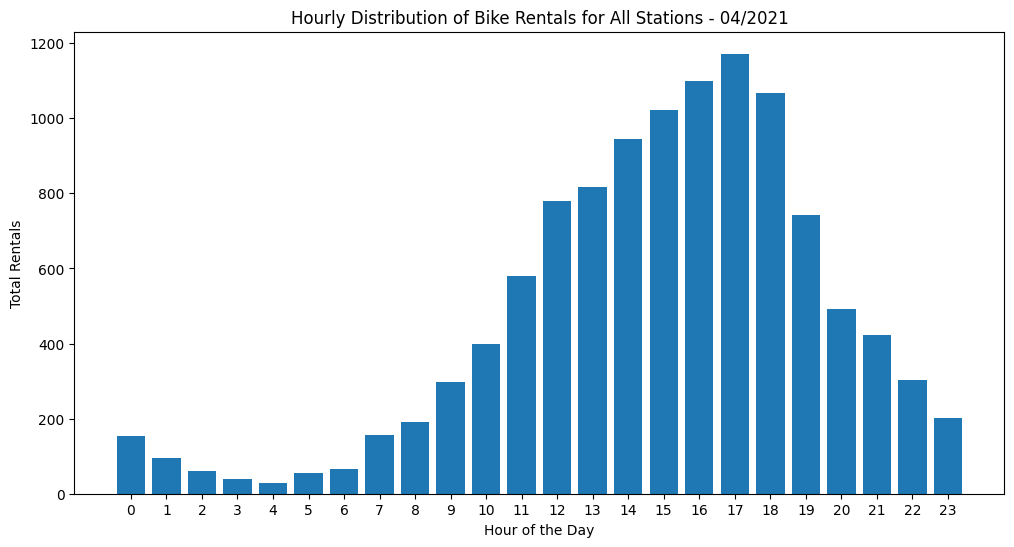

In [ ]:

trips = calculations.trips
trips['month'] = trips['Starttime'].dt.strftime('%m/%Y')
month_data = trips[trips['month'] == filter_month]
hourly_data = month_data.groupby('hour').size().reset_index(name='total_rentals')
plt.figure(figsize=(12, 6))
plt.bar(hourly_data['hour'], hourly_data['total_rentals'])
plt.title(f'Hourly Distribution of Bike Rentals for All Stations - {filter_month}')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.xticks(hourly_data['hour']) 
plt.show()


### Task 2.4

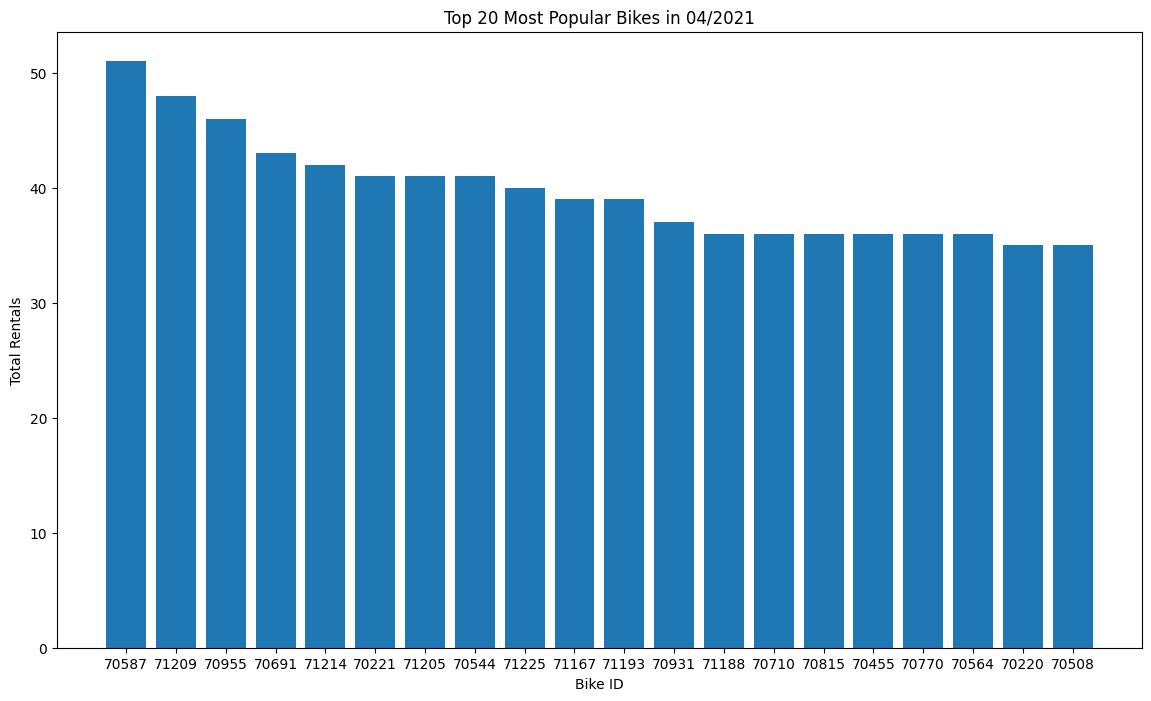

,Bikeid,rentals_count
189,70587,51
571,71209,48
478,70955,46
274,70691,43
575,71214,42
...,...,...
407,70852,2
406,70851,2
333,70775,2
344,70787,2


In [ ]:

trips['Starttime'] = pd.to_datetime(trips['Starttime'])
trips['day'] = trips['Starttime'].dt.strftime('%m/%d/%Y')
daily_bike_rentals = trips.groupby(['day', 'Bikeid']).size().reset_index(name='rentals_count')
filter_month = '04/2021'
daily_bike_rentals['month'] = pd.to_datetime(daily_bike_rentals['day'], format='%m/%d/%Y').dt.strftime('%m/%Y')
monthly_bike_rentals = daily_bike_rentals[daily_bike_rentals['month'] == filter_month]
monthly_bike_totals = monthly_bike_rentals.groupby('Bikeid')['rentals_count'].sum().reset_index()
top_20_bikes = monthly_bike_totals.sort_values(by='rentals_count', ascending=False).head(20)
plt.figure(figsize=(14, 8))
plt.bar(top_20_bikes['Bikeid'].astype(str), top_20_bikes['rentals_count'])
plt.title('Top 20 Most Popular Bikes in ' + filter_month)
plt.xlabel('Bike ID')
plt.ylabel('Total Rentals')
plt.show()
sorted_bike_rentals = monthly_bike_totals.sort_values(by='rentals_count', ascending=False)
display(sorted_bike_rentals)



---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

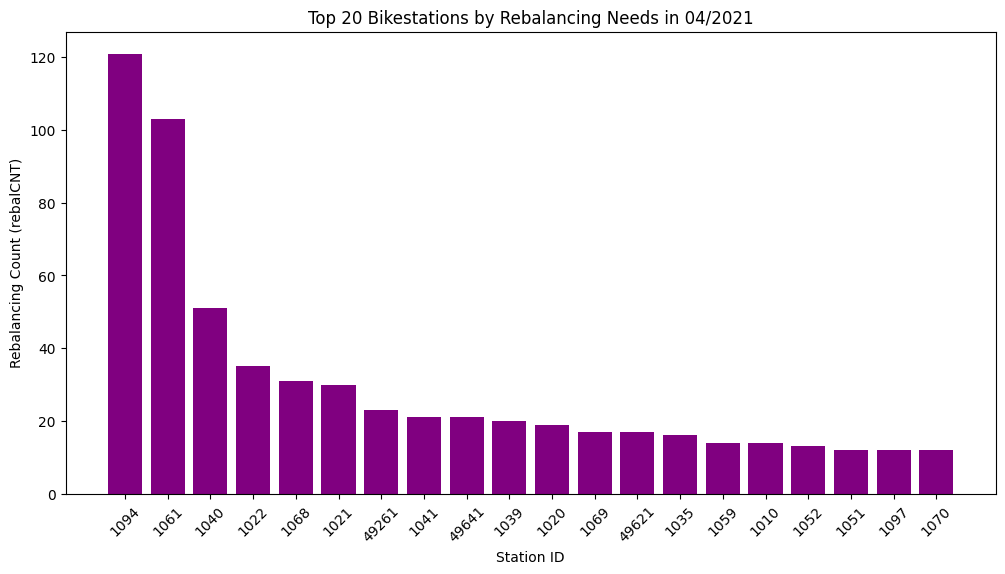

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

daily_counts['day'] = pd.to_datetime(daily_counts['day'], format='%m/%d/%Y')
daily_counts['month_year'] = daily_counts['day'].dt.strftime('%m/%Y')
filter_month = '04/2021'
monthly_rebalancing = daily_counts[daily_counts['month_year'] == filter_month]
monthly_rebalancing_totals = monthly_rebalancing.groupby('station_id')['rebalCNT'].sum().reset_index()
top_rebalancing_stations = monthly_rebalancing_totals.sort_values(by='rebalCNT', ascending=False).head(20)
plt.figure(figsize=(12, 6))
plt.bar(top_rebalancing_stations['station_id'].astype(str), top_rebalancing_stations['rebalCNT'], color='purple')
plt.title('Top 20 Bikestations by Rebalancing Needs in ' + filter_month)
plt.xlabel('Station ID')
plt.ylabel('Rebalancing Count (rebalCNT)')
plt.xticks(rotation=45)  
plt.show()


### Task 3.2

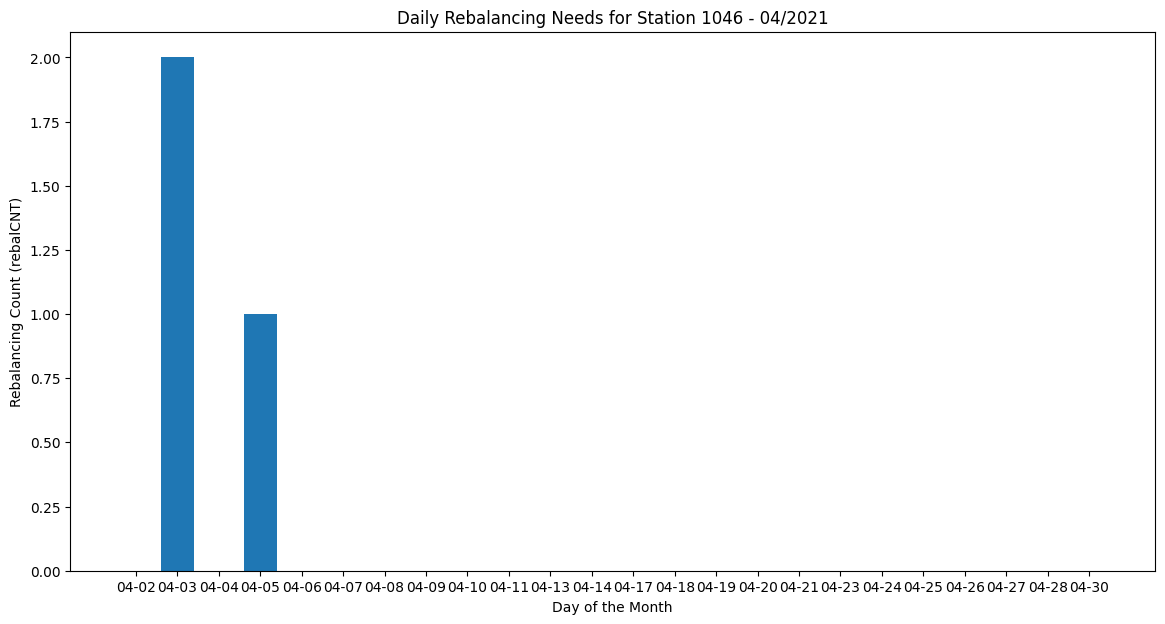

In [ ]:

daily_counts['day'] = pd.to_datetime(daily_counts['day'], format='%m/%d/%Y')
daily_counts['month_year'] = daily_counts['day'].dt.strftime('%m/%Y')
filtered_rebalancing = daily_counts[(daily_counts['month_year'] == filter_month) & 
                                    (daily_counts['station_id'] == filter_stationID)]
filtered_rebalancing = filtered_rebalancing.sort_values(by='day')
plt.figure(figsize=(14, 7))
plt.bar(filtered_rebalancing['day'].dt.strftime('%m-%d'), filtered_rebalancing['rebalCNT'])
plt.title(f'Daily Rebalancing Needs for Station {filter_stationID} - {filter_month}')
plt.xlabel('Day of the Month')
plt.ylabel('Rebalancing Count (rebalCNT)')
plt.show()



---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

second_quarter_months = ['04/2021', '05/2021', '06/2021']
q2_data = monthly_counts[monthly_counts['month'].isin(second_quarter_months)]

feature_space = q2_data.pivot_table(index='station_id', 
                                    columns='month', 
                                    values=['fromCNT', 'rebalCNT'], 
                                    aggfunc='sum').fillna(0)

feature_space.columns = ['_'.join(col).strip() for col in feature_space.columns.values]
feature_space.reset_index(inplace=True)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(feature_space.iloc[:, 1:])
k_means_results = {k: KMeans(n_clusters=k, random_state=42).fit_predict(X_normalized) for k in [3, 4, 5]}
dbscan_results = {(eps, min_samples): DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_normalized) 
                  for eps, min_samples in [(0.2, 5), (0.5, 5), (0.6, 5)]}
print(k_means_results, dbscan_results)




{3: array([2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32), 4: array([2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32), 5: array([2, 0, 4, 1, 4, 1, 1, 1, 1, 1, 0, 4, 2, 0, 1, 4, 4, 0, 1, 4, 1, 1,
       1, 4, 4, 1, 1, 1, 4, 4, 4, 4, 0, 4, 1, 4, 4, 4, 4, 1, 0, 1, 4, 4,
       0, 4, 4, 0, 0, 1, 1, 1, 1, 1, 4, 0, 4, 3, 1, 1, 1, 1, 1, 1, 1, 0,
     

### Task 4.2

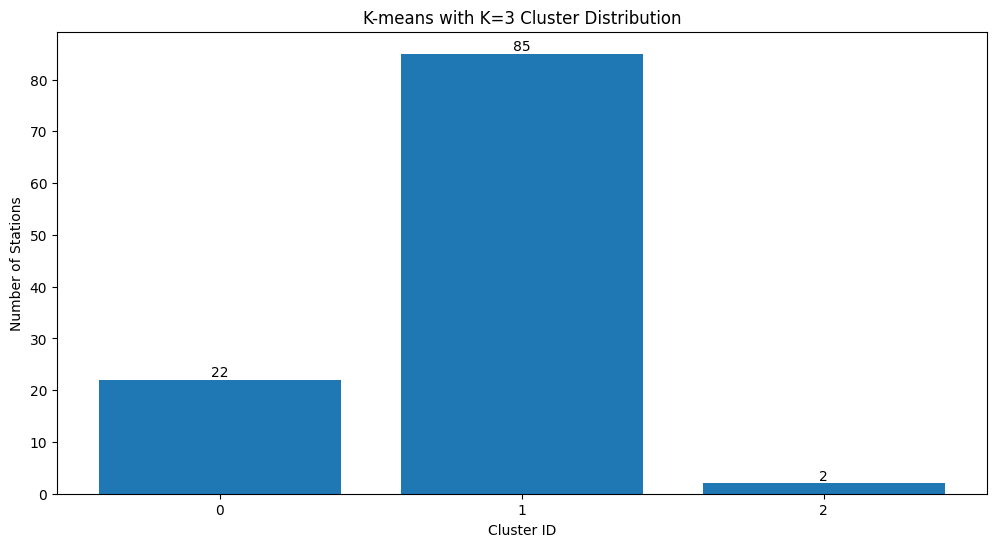

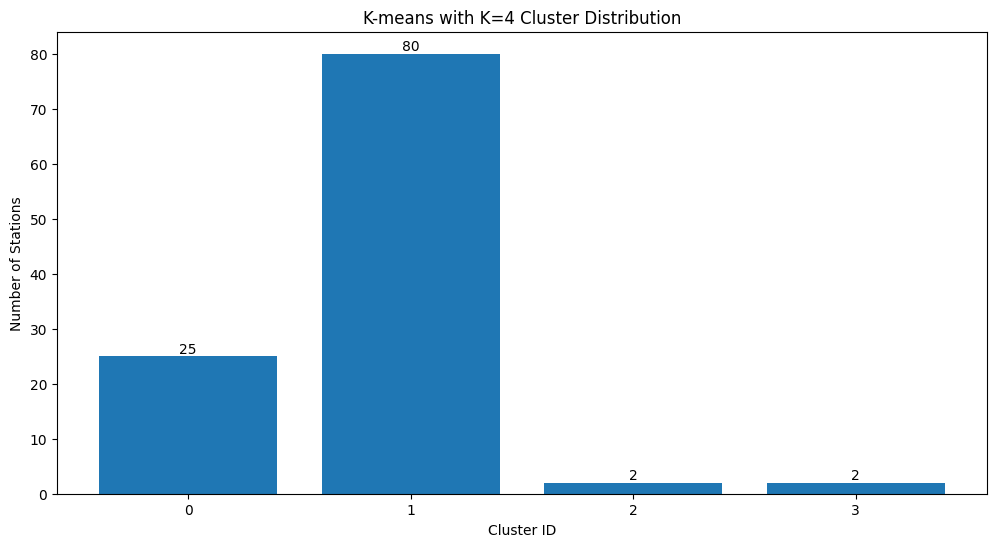

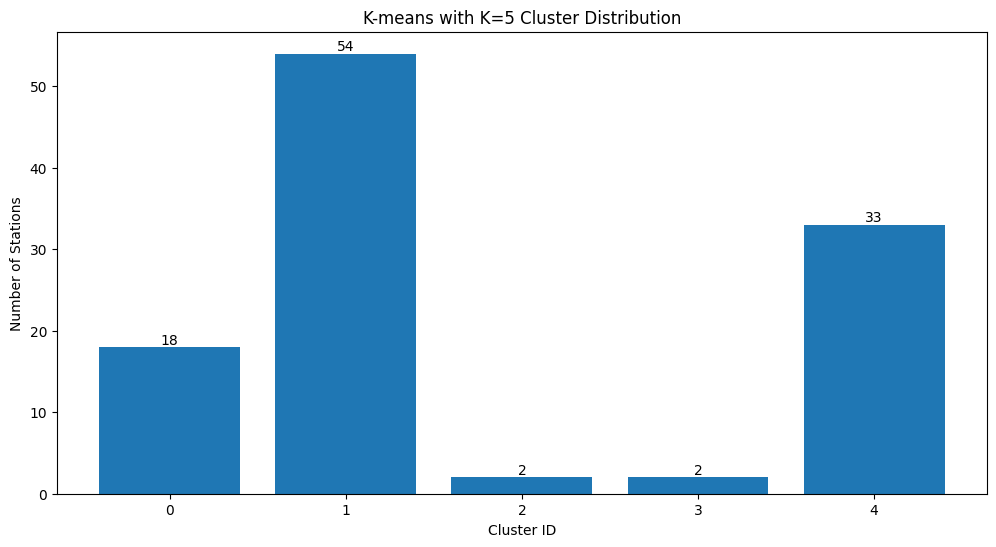

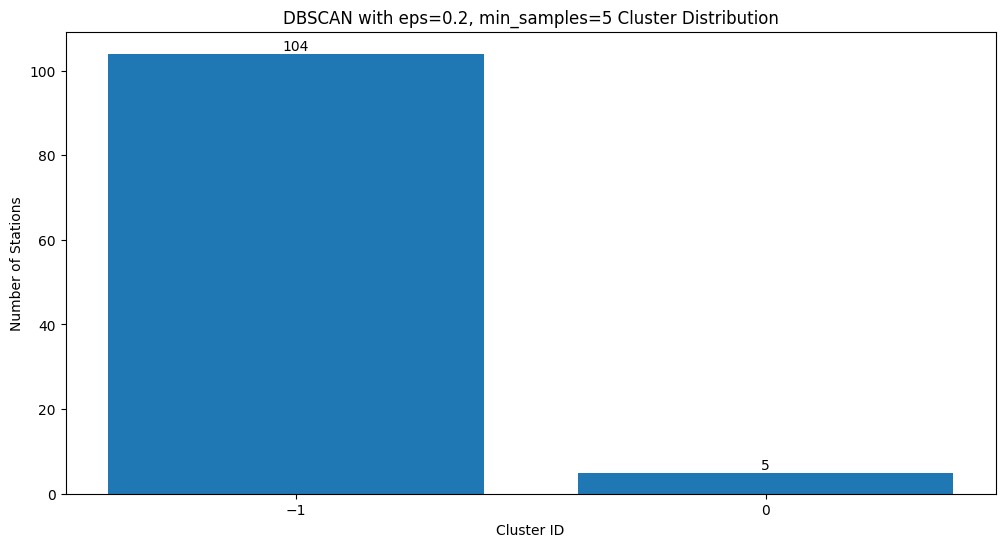

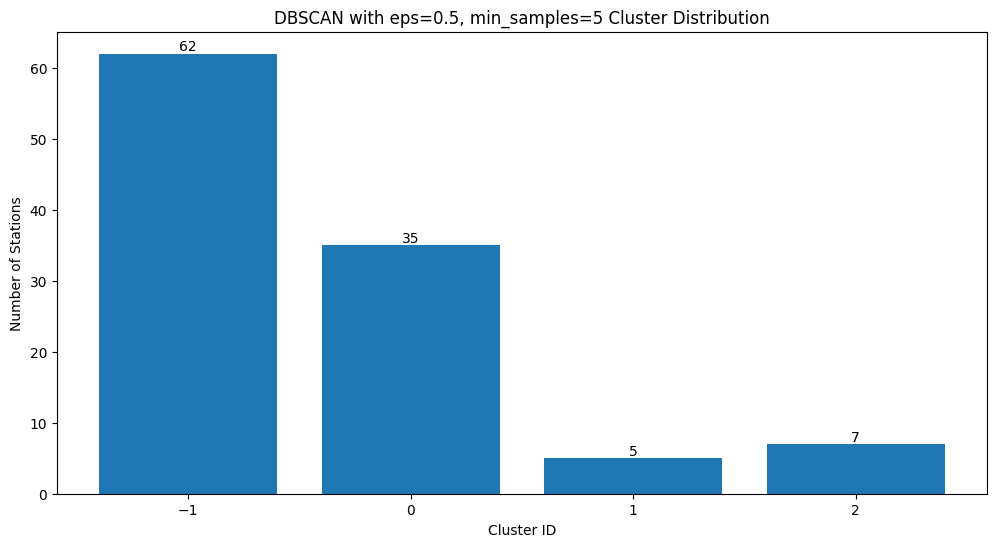

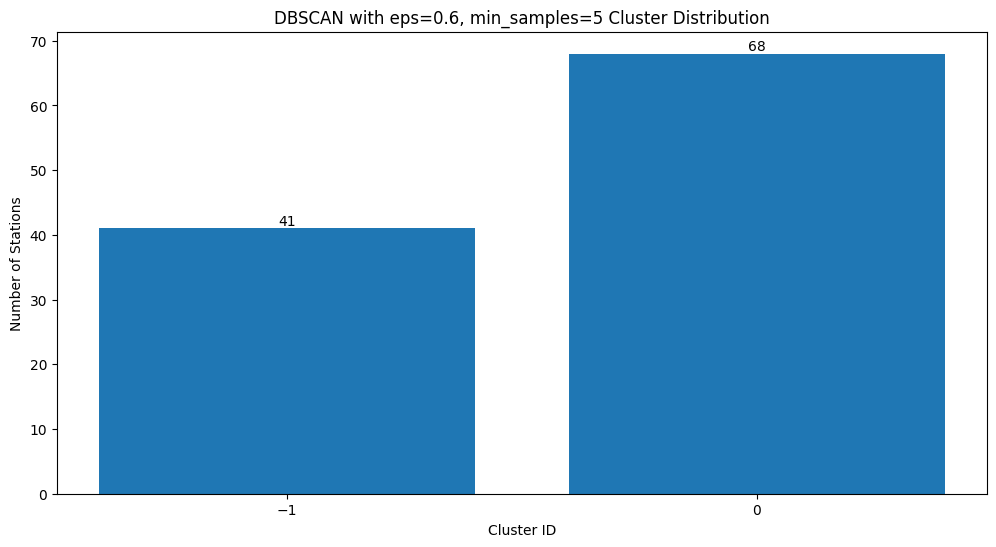

In [ ]:
def plot_cluster_distribution(labels, title):
    unique, counts = np.unique(labels, return_counts=True)
    cluster_counts = dict(zip(unique, counts))
    
    sorted_clusters = sorted(cluster_counts.items(), key=lambda item: item[1], reverse=True)
    sorted_cluster_ids = [item[0] for item in sorted_clusters]
    sorted_counts = [item[1] for item in sorted_clusters]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(sorted_cluster_ids, sorted_counts)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
    plt.title(title)
    plt.xlabel('Cluster ID')
    plt.ylabel('Number of Stations')
    plt.xticks(sorted_cluster_ids)
    plt.show()
for k, labels in k_means_results.items():
    plot_cluster_distribution(labels, f'K-means with K={k} Cluster Distribution')

for params, labels in dbscan_results.items():
    plot_cluster_distribution(labels, f'DBSCAN with eps={params[0]}, min_samples={params[1]} Cluster Distribution')



### Task 4.3

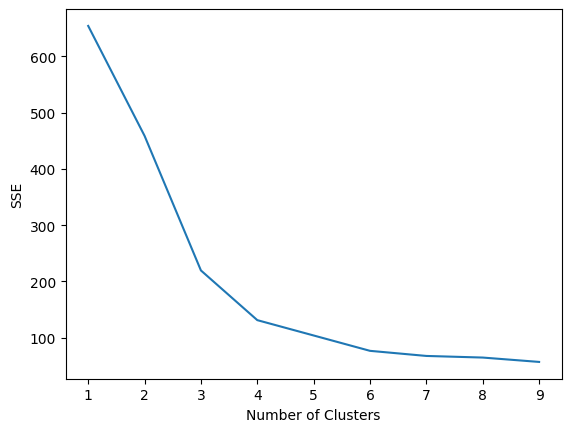

In [ ]:
sse = {}
for k in range(1, 10): 
    kmeans = KMeans(n_clusters=k).fit(X_normalized)  
    sse[k] = kmeans.inertia_  

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


### Task 4.4

In [ ]:
#Based off the above graphs and outputs, i would determine that k-means clustering is the best method for the dataset. This however is a subjective opinion,
# I like k-means where k=5 as it provides a good seperation of the data without overfitting the plot. It should be noted that k-means does a poor job at 
# Taking into account outliers where dbscan is much better so it 